In [1]:
### ValDXer testing
import os
os.environ['HDXER_PATH'] = '/home/alexi/Documents/HDXer'


In [2]:
# from autonotebook import tqdm as notebook_tqdm

from ValDX.ValidationDX import ValDXer
from ValDX.VDX_Settings import Settings

settings = Settings(name='test')
settings.replicates = 2
settings.gamma_range = (1,8)
settings.train_frac = 0.5
settings.times = [0.0, 0.5, 5.0]
settings.split_mode = 'r'
settings.RW_exponent = [0]
settings.HDXer_stride = 1 # this must be smaller than the size of trajectory
settings.RW_do_reweighting = False
settings.stride = 1000
import pickle

VDX = ValDXer(settings)
expt_name = 'HOIP_dab3'
test_name = "HOIPdab3"


/home/alexi/Documents/ValDX


Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
Experiment name test already exists. Attempting to change name to test0
Experiment name test already exists. Attempting to change name to test1
Experiment name test already exists. Attempting to change name to test2
Experiment name test already exists. Attempting to change name to test3
Experiment name test already exists. Attempting to change name to test4
Experiment name test already exists. Attempting to change name to test5
Experiment name test already exists. Attempting to change name to test6
Experiment name test already exists. Attempting to change name to test7
Experiment name test already exists. Attempting to change name to test8
Experiment name test already exists. Attempting to change name to test9
Experiment name test already exists. Attempting to change name to test10
Experiment name test already exists. Attempting to change name to test11
Experiment name test already exists. Attempting to change name 

In [3]:
import os
print(os.getenv('HDXER_PATH'))


/home/alexi/Documents/HDXer


In [4]:
print(os.environ["HDXER_PATH"])
print(__name__)

/home/alexi/Documents/HDXer
__main__


In [5]:
import pandas as pd
raw_csv = os.path.join("raw_data", "HOIP","dab3","dab3_3_excel.csv")

raw_df = pd.read_csv(raw_csv)
# remove multilevel columns


In [6]:
# print(raw_df.head())

# select state dab3
dab3_df = raw_df[raw_df['State'] == 'dAb3_3']


# add 697 to Start and End  
dab3_df['Start'] = dab3_df['Start'] 
dab3_df['End'] = dab3_df['End']

# add UptakeFraction column
dab3_df['UptakeFraction'] = dab3_df['Uptake'] / dab3_df['MaxUptake']
dab3_df.tail()


Protein  Unnamed: 1  Unnamed: 2  Start  End                   Sequence  \
322  HOIP-RBR        1032        1056    336  360  ATERYLHVRPQPLAGEDPPAYQARL   
323  HOIP-RBR        1034        1056    338  360    ERYLHVRPQPLAGEDPPAYQARL   
324  HOIP-RBR        1035        1056    339  360     RYLHVRPQPLAGEDPPAYQARL   
325  HOIP-RBR        1038        1056    342  360        HVRPQPLAGEDPPAYQARL   
326  HOIP-RBR        1057        1075    361  379        LQKLTEEVPLGQSIPRRRK   

     Modification  Fragment  MaxUptake        MHP   State  Exposure  \
322           NaN       NaN         20  2848.4853  dAb3_3       5.0   
323           NaN       NaN         18  2676.4005  dAb3_3       5.0   
324           NaN       NaN         17  2547.3579  dAb3_3       5.0   
325           NaN       NaN         14  2115.1094  dAb3_3       5.0   
326           NaN       NaN         16  2248.3248  dAb3_3       5.0   

          Center  Center SD    Uptake  Uptake SD        RT     RT SD  \
322  2855.389752   0.050030  5.176299   0.054997  6.028652  0.002530   
323  2682.862836   0.078566  4.863580   0.088043  6.013863  0.002566   
324  2553.745613   0.049922  4.922553   0.086997  5.958447  0.002980   
325  2120.299467   0.065218  3.958915   0.107950  5.716731  0.001727   
326  2255.862180   0.101628  6.266518   0.104689  5.058567  0.003351   

     UptakeFraction  
322        0.258815  
323        0.270199  
324        0.289562  
325        0.282780  
326        0.391657

In [7]:
columns_to_drop = ["Protein", "Sequence", "Fragment", "Modification", "State", "MaxUptake", "Uptake", "MHP", "Center", "Center SD", "Uptake", "Uptake SD", "RT", "RT SD"]
dab3_df = dab3_df.drop(columns_to_drop, axis=1)
dab3_df.head()

Unnamed: 1  Unnamed: 2  Start  End  Exposure  UptakeFraction
0         697         703      1    7       0.0             0.0
1         702         714      6   18       0.0             0.0
2         702         717      6   21       0.0             0.0
3         702         721      6   25       0.0             0.0
4         703         714      7   18       0.0             0.0

In [8]:
dab3_df= dab3_df.drop(columns=['Unnamed: 1','Unnamed: 2'])
dab3_df.head()


Start  End  Exposure  UptakeFraction
0      1    7       0.0             0.0
1      6   18       0.0             0.0
2      6   21       0.0             0.0
3      6   25       0.0             0.0
4      7   18       0.0             0.0

In [9]:

# pivot exposure and uptake fraction
dab3_df = dab3_df.groupby(['Start', 'End', 'Exposure'])['UptakeFraction'].mean().reset_index()

dab3_df.head()


Start  End  Exposure  UptakeFraction
0      1    7       0.0        0.000000
1      1    7       0.5        0.466735
2      1    7       5.0        0.435965
3      6   18       0.0        0.000000
4      6   18       0.5        0.329021

In [10]:
dab3_df.columns

Index(['Start', 'End', 'Exposure', 'UptakeFraction'], dtype='object')

In [11]:

# remove End > 1072
dab3_df = dab3_df.loc[dab3_df['End'] <= 1072-697]
dab3_df.head()


Start  End  Exposure  UptakeFraction
0      1    7       0.0        0.000000
1      1    7       0.5        0.466735
2      1    7       5.0        0.435965
3      6   18       0.0        0.000000
4      6   18       0.5        0.329021

In [12]:
dab3_df = dab3_df.pivot(index=['Start','End'], columns='Exposure', values='UptakeFraction')


In [13]:

# print entire dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(dab3_df)


Exposure   0.0       0.5       5.0
Start End                         
1     7    0.0  0.466735  0.435965
6     18   0.0  0.329021  0.417331
      21   0.0  0.437678  0.514648
      25   0.0  0.494072  0.550188
7     18   0.0  0.409742  0.499738
      21   0.0  0.465488  0.532689
      25   0.0  0.518648  0.575634
8     18   0.0  0.428948  0.505906
      20   0.0  0.487081  0.544802
      21   0.0  0.490184  0.554119
      24   0.0  0.522236  0.584780
11    18   0.0  0.490079  0.531893
      20   0.0  0.543597  0.572614
      21   0.0  0.548075  0.583051
      23   0.0  0.603121  0.626074
      25   0.0  0.575935  0.598220
19    25   0.0  0.560898  0.587244
26    32   0.0  0.162769  0.272038
      33   0.0  0.163224  0.282758
27    33   0.0  0.159595  0.267070
33    40   0.0  0.309840  0.407468
34    40   0.0  0.325881  0.412225
      41   0.0  0.317411  0.423762
41    48   0.0  0.381343  0.389136
      49   0.0  0.356548  0.373868
      51   0.0  0.351628  0.404541
42    49   0.0  0.29

In [14]:
#print row 3
print(dab3_df.iloc[0])


Exposure
0.0    0.000000
0.5    0.466735
5.0    0.435965
Name: (1, 7), dtype: float64


In [15]:
# fill in missing

dab3_df.reset_index(inplace=True)

# Forward fill the 'Start' column
dab3_df['Start'] = dab3_df['Start'].ffill()

# Set 'Start' and 'End' back as the index if needed
dab3_df.set_index(['Start', 'End'], inplace=True)


In [16]:
# save with space delimiter
# round to 5 dp

dab3_df = dab3_df.round(5)
dab3_df.to_csv(os.path.join("raw_data", "HOIP", 'HOIP_dab3_dfs.csv'), sep=' ')

In [17]:




dab3_df.to_csv(os.path.join("raw_data", "HOIP", "dab3.csv"), index=False)

In [18]:
# select only Start and End
dab3_df.reset_index(inplace=True)

dab3_segs = dab3_df[['Start', 'End']]
# dab3_segs.drop(columns=["Exposure"])

dab3_segs.head()


Exposure  Start  End
0             1    7
1             6   18
2             6   21
3             6   25
4             7   18

In [19]:
import subprocess
from ValDX.helpful_funcs import conda_to_env_dict

# Assuming settings.HDXer_env contains the name of your Conda environment
env_path = conda_to_env_dict(settings.HDXer_env)

command = "echo $HDXER_PATH"
print("command:", command)

# Run the command in the subprocess
output = subprocess.run(command, shell=True, env=env_path, capture_output=True, text=True)

# Capture and print the standard output (stdout)
hdxer_path = output.stdout.strip()  # .strip() removes any trailing newline
print("HDXER_PATH:", hdxer_path)


Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
command: echo $HDXER_PATH
HDXER_PATH: /home/alexi/Documents/HDXer


In [20]:
# BPTI data
BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI"
BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI"



In [21]:
expt_dir = "/home/alexi/Documents/ValDX/raw_data/HOIP/dab3"

os.listdir(expt_dir)

segs_name = "HOIP_dab3_segs.txt"
segs_path = os.path.join(expt_dir, segs_name)

hdx_name = "HOIP_dab3_dfs.dat"
hdx_path = os.path.join(expt_dir, hdx_name)
print(hdx_path)

rates_name = "out__train_HOIPdab3_1Intrinsic_rates.dat" #need to correct this
rates_path =os.path.join(expt_dir, rates_name)


/home/alexi/Documents/ValDX/raw_data/HOIP/dab3/HOIP_dab3_dfs.dat


In [22]:
segs = [(1, 7),
 (6, 18),
 (6, 21),
 (6, 25),
 (7, 18),
 (7, 21),
 (7, 25),
 (8, 18),
 (8, 20),
 (8, 21),
 (8, 24),
 (11, 18),
 (11, 20),
 (11, 21),
 (11, 23),
 (11, 25),
 (19, 25),
 (26, 32),
 (26, 33),
 (27, 33),
 (33, 40),
 (34, 40),
 (34, 41),
 (41, 48),
 (41, 49),
 (41, 51),
 (42, 49),
 (42, 51),
 (42, 65),
 (49, 61),
 (49, 65),
 (50, 65),
 (52, 61),
 (52, 65),
 (74, 84),
 (76, 84),
 (77, 84),
 (77, 85),
 (77, 87),
 (77, 88),
 (77, 97),
 (85, 97),
 (86, 97),
 (88, 97),
 (89, 97),
 (98, 104),
 (98, 106),
 (98, 108),
 (113, 120),
 (114, 120),
 (117, 131),
 (121, 131),
 (121, 132),
 (132, 149),
 (132, 150),
 (132, 153),
 (150, 169),
 (151, 162),
 (151, 167),
 (151, 169),
 (151, 170),
 (154, 169),
 (155, 169),
 (169, 183),
 (170, 183),
 (170, 185),
 (170, 186),
 (171, 183),
 (171, 186),
 (184, 195),
 (184, 208),
 (187, 195),
 (187, 208),
 (187, 209),
 (188, 208),
 (194, 208),
 (196, 208),
 (213, 223),
 (224, 238),
 (224, 239),
 (247, 257),
 (247, 259),
 (247, 260),
 (248, 257),
 (248, 259),
 (248, 260),
 (250, 257),
 (250, 260),
 (253, 260),
 (261, 275),
 (261, 276),
 (261, 278),
 (261, 281),
 (305, 313),
 (305, 315),
 (308, 315),
 (314, 327),
 (316, 327),
 (317, 327),
 (333, 356),
 (334, 356),
 (334, 357),
 (336, 356),
 (336, 357),
 (336, 360),
 (338, 360),
 (339, 360),
 (342, 360)]


In [23]:

# save as tabbed txt file between each column
with open(segs_path, 'w') as f:
    for seg in segs:
        f.write("%s\t%s\n" % seg)


In [24]:

VDX.load_HDX_data(HDX_path=hdx_path, SEG_path=segs_path, calc_name=expt_name)
VDX.load_intrinsic_rates(path=rates_path, calc_name=expt_name)


Preparing HDX data for HOIP_dab3
Path /home/alexi/Documents/ValDX/raw_data/HOIP/dab3/HOIP_dab3_dfs.dat
AVG: ncol = 5, len(names) = 3


In [25]:
print(VDX.rates)

                                               rates  calc_name
0  {2: 41000.97419937, 3: 3739.33329324, 4: 4495....  HOIP_dab3


In [26]:
print(VDX.paths)


                                                 HDX  \
0  /home/alexi/Documents/ValDX/raw_data/HOIP/dab3...   
1                                                NaN   

                                                 SEG  calc_name  experimental  \
0  /home/alexi/Documents/ValDX/raw_data/HOIP/dab3...  HOIP_dab3         False   
1                                                NaN  HOIP_dab3         False   

                                           int_rates  
0                                                NaN  
1  /home/alexi/Documents/ValDX/raw_data/HOIP/dab3...  


In [27]:
HOIP_dir = "/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3"
# list of folders in HOIP_dir
import glob
reps = 5


reps_list = [os.path.join(HOIP_dir, f"R_{i}") for i in range(1, reps+1)]

print(reps_list)


traj_names = ["APO_dab3_6SC6_7-nojump.xtc"]

reordered_traj_names = ["APO_dab3_6SC6_7-nojump_reordered.xtc"]


['/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_1', '/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_2', '/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_3', '/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_4', '/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_5']


In [28]:
sim_name = "HOIP_dab3_APO"
top_name = "APO_dab3_6SC6_7-nojump.pdb"
reordered_top_name = "APO_dab3_6SC6_7-nojump_reordered.pdb"

top_path = os.path.join(HOIP_dir, top_name)
# reps =100


In [29]:
# test reordering 
# HOIP Chain B resi 697-1072
# dab3 Chain A C resi 1-120
import MDAnalysis as mda

top_test = mda.Universe(top_path)
print(top_test.atoms)

HOIP_selection = "protein and segid B and resid 697:1072"
dab3_selection1 = "protein and segid A and resid 1:120"
dab3_selection2 = "protein and segid C and resid 1:120"

HOIP = top_test.select_atoms(HOIP_selection)
# set to Chain A
# for atom in HOIP:
#     atom.segment.segid = "A"
    # set chain to A
dab3_1 = top_test.select_atoms(dab3_selection1)
# for atom in dab3_1:
#     atom.segment.segid = "B"
dab3_2 = top_test.select_atoms(dab3_selection2)
# for atom in dab3_2:
#     atom.segment.segid = "C"

new_order = HOIP + dab3_1 + dab3_2

print(new_order)

new_order_universe = mda.Merge(new_order)
# # renumber residues
# for idx, res in enumerate(new_order_universe.residues):
#     res.resid = idx + 1

print(new_order_universe.atoms)



# save pdb
reordered_top_path = os.path.join(HOIP_dir, reordered_top_name)
new_order_universe.atoms.write(reordered_top_path)


<AtomGroup [<Atom 1: N of type N of resname GLU, resid 1 and segid A and altLoc >, <Atom 2: H1 of type H of resname GLU, resid 1 and segid A and altLoc >, <Atom 3: H2 of type H of resname GLU, resid 1 and segid A and altLoc >, ..., <Atom 9551: C of type C of resname SER, resid 120 and segid C and altLoc >, <Atom 9552: OC1 of type O of resname SER, resid 120 and segid C and altLoc >, <Atom 9553: OC2 of type O of resname SER, resid 120 and segid C and altLoc >]>
<AtomGroup [<Atom 1811: N of type N of resname GLN, resid 697 and segid B and altLoc >, <Atom 1812: H1 of type H of resname GLN, resid 697 and segid B and altLoc >, <Atom 1813: H2 of type H of resname GLN, resid 697 and segid B and altLoc >, ..., <Atom 9551: C of type C of resname SER, resid 120 and segid C and altLoc >, <Atom 9552: OC1 of type O of resname SER, resid 120 and segid C and altLoc >, <Atom 9553: OC2 of type O of resname SER, resid 120 and segid C and altLoc >]>
<AtomGroup [<Atom 1: N of type N of resname GLN, resid 

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:777: UserWarning: Unit cell dimensions not found. CRYST1 record set to unitary values.
  warnings.warn("Unit cell dimensions not found. "
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:1153: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"


In [30]:
# re number residues with pdb-tools
renumbered_path = os.path.join(HOIP_dir, "renumbered.pdb")
!pdb_reres -1 {reordered_top_path} > {renumbered_path}

In [31]:

# read in reordered pdb as text
with open(reordered_top_path, 'r') as f:
    reordered_pdb = f.readlines()

    new_lines = []
    for line in reordered_pdb:
        # print(line)
        split = line.split()
        if "ATOM" == split[0]:
            print(line)
            print(line[21])
            print(line[72])
            # replace index 21 with 72
            line = line[:21] + line[72] + line[22:]
            # break

        new_lines.append(line)

# with open(reordered_top_path, 'w') as f:
#     f.writelines(new_lines)
        
    




ATOM      1  N   GLN B 697      59.300  78.280  23.980  1.00  0.00      B    N  

B
B
ATOM      2  H1  GLN B 697      60.100  78.740  23.560  1.00  0.00      B    H  

B
B
ATOM      3  H2  GLN B 697      58.670  77.870  23.310  1.00  0.00      B    H  

B
B
ATOM      4  H3  GLN B 697      58.680  78.890  24.480  1.00  0.00      B    H  

B
B
ATOM      5  CA  GLN B 697      59.900  77.200  24.830  1.00  0.00      B    C  

B
B
ATOM      6  HA  GLN B 697      60.590  77.700  25.500  1.00  0.00      B    H  

B
B
ATOM      7  CB  GLN B 697      58.780  76.400  25.660  1.00  0.00      B    C  

B
B
ATOM      8  HB1 GLN B 697      59.220  75.550  26.170  1.00  0.00      B    H  

B
B
ATOM      9  HB2 GLN B 697      58.140  76.010  24.870  1.00  0.00      B    H  

B
B
ATOM     10  CG  GLN B 697      57.920  77.310  26.580  1.00  0.00      B    C  

B
B
ATOM     11  HG1 GLN B 697      57.320  77.970  25.960  1.00  0.00      B    H  

B
B
ATOM     12  HG2 GLN B 697      58.500  78.000  27.180

In [32]:

#traj_paths is a list of every combination of rep_paths and traj_names

traj_paths = []
for rep_path in reps_list:
    for traj_name in traj_names:
        path = os.path.join(rep_path, traj_name)
        print(path)
        traj_paths.append(path)

# print(top_path)


/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_1/APO_dab3_6SC6_7-nojump.xtc
/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_2/APO_dab3_6SC6_7-nojump.xtc
/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_3/APO_dab3_6SC6_7-nojump.xtc
/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_4/APO_dab3_6SC6_7-nojump.xtc
/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_5/APO_dab3_6SC6_7-nojump.xtc


In [33]:
# test reordering 
# HOIP Chain B resi 697-1072
# dab3 Chain A C resi 1-120
import MDAnalysis as mda

top_test = mda.Universe(top_path, traj_paths)
print(len(top_test.trajectory))
print(top_test.atoms)

HOIP_selection = "protein and segid B and resid 697:1072"
dab3_selection1 = "protein and segid A and resid 1:120"
dab3_selection2 = "protein and segid C and resid 1:120"

HOIP = top_test.select_atoms(HOIP_selection)
# set to Chain A
# for atom in HOIP:
#     atom.segment.segid = "A"
    # set chain to A
dab3_1 = top_test.select_atoms(dab3_selection1)
# for atom in dab3_1:
#     atom.segment.segid = "B"
dab3_2 = top_test.select_atoms(dab3_selection2)
# for atom in dab3_2:
#     atom.segment.segid = "C"

new_order = HOIP + dab3_1 + dab3_2

print(new_order)

new_order_universe = mda.Merge(new_order)
print(len(new_order_universe.trajectory))

# Renumber residues if needed
# new_resid = 1
# for residue in new_order_universe.residues:
#     residue.resid = new_resid
#     new_resid += 1

print(new_order_universe.atoms)
# new_order_universe.atoms.write("test.pdb")

# Prepare to write the new trajectory
new_traj_path = os.path.join(HOIP_dir, reordered_traj_names[0])
with mda.Writer(new_traj_path, new_order_universe.atoms.n_atoms) as W:
    for ts in top_test.trajectory[::settings.stride]:
        # Update positions of the new universe to match the current timestep
        new_order_universe.atoms.positions = top_test.atoms.positions
        # Write the timestep to the new trajectory
        W.write(new_order_universe)
        # W.write(new_order_universe)
        # break




5005
<AtomGroup [<Atom 1: N of type N of resname GLU, resid 1 and segid A and altLoc >, <Atom 2: H1 of type H of resname GLU, resid 1 and segid A and altLoc >, <Atom 3: H2 of type H of resname GLU, resid 1 and segid A and altLoc >, ..., <Atom 9551: C of type C of resname SER, resid 120 and segid C and altLoc >, <Atom 9552: OC1 of type O of resname SER, resid 120 and segid C and altLoc >, <Atom 9553: OC2 of type O of resname SER, resid 120 and segid C and altLoc >]>
<AtomGroup [<Atom 1811: N of type N of resname GLN, resid 697 and segid B and altLoc >, <Atom 1812: H1 of type H of resname GLN, resid 697 and segid B and altLoc >, <Atom 1813: H2 of type H of resname GLN, resid 697 and segid B and altLoc >, ..., <Atom 9551: C of type C of resname SER, resid 120 and segid C and altLoc >, <Atom 9552: OC1 of type O of resname SER, resid 120 and segid C and altLoc >, <Atom 9553: OC2 of type O of resname SER, resid 120 and segid C and altLoc >]>
1
<AtomGroup [<Atom 1: N of type N of resname GLN,

In [34]:
test_top = mda.Universe(renumbered_path, new_traj_path)
 
print(test_top.atoms)
print(len(test_top.trajectory)) 

<AtomGroup [<Atom 1: N of type N of resname GLN, resid 1 and segid B and altLoc >, <Atom 2: H1 of type H of resname GLN, resid 1 and segid B and altLoc >, <Atom 3: H2 of type H of resname GLN, resid 1 and segid B and altLoc >, ..., <Atom 9551: C of type C of resname SER, resid 616 and segid C and altLoc >, <Atom 9552: OC1 of type O of resname SER, resid 616 and segid C and altLoc >, <Atom 9553: OC2 of type O of resname SER, resid 616 and segid C and altLoc >]>
6


/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/MDAnalysis/coordinates/XDR.py:240: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "


In [35]:
print(traj_paths)
VDX.load_structures(top_path=renumbered_path, traj_paths=[new_traj_path], calc_name=test_name)
# VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=test_name)


['/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_1/APO_dab3_6SC6_7-nojump.xtc', '/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_2/APO_dab3_6SC6_7-nojump.xtc', '/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_3/APO_dab3_6SC6_7-nojump.xtc', '/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_4/APO_dab3_6SC6_7-nojump.xtc', '/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_5/APO_dab3_6SC6_7-nojump.xtc']
                                                 HDX  \
0  /home/alexi/Documents/ValDX/raw_data/HOIP/dab3...   
1                                                NaN   
2                                                NaN   

                                                 SEG  calc_name experimental  \
0  /home/alexi/Documents/ValDX/raw_data/HOIP/dab3...  HOIP_dab3        False   
1                                                NaN  HOIP_dab3        False   
2                                                NaN   HOIPdab3          NaN   

                  

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


In [36]:
# import MDAnalysis as mda
# from MDAnalysis.coordinates.DCD import DCDWriter  # Import DCDWriter directly

# small_traj_paths = []

# for rep in range(len(traj_paths)):
#     traj = traj_paths[rep]
#     u = mda.Universe(top_path, traj)
#     print(u.trajectory.n_frames)

#     # sample by stride settings.stide

#     small_traj_name = traj.replace(".dcd", f"_str{settings.stride}.dcd")

#     # Create an AtomGroup from the Universe's selection
#     ag = u.select_atoms('all')

#     # write traj
#     with DCDWriter(small_traj_name, ag.n_atoms) as writer:
#         for ts in u.trajectory[::settings.stride]:
#             writer.write(ag)

#     small_traj_paths.append(small_traj_name)

In [37]:
print((traj_paths))

['/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_1/APO_dab3_6SC6_7-nojump.xtc', '/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_2/APO_dab3_6SC6_7-nojump.xtc', '/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_3/APO_dab3_6SC6_7-nojump.xtc', '/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_4/APO_dab3_6SC6_7-nojump.xtc', '/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_5/APO_dab3_6SC6_7-nojump.xtc']


In [38]:
VDX.paths.top.dropna().values[0]

'/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/renumbered.pdb'

Random seeds: [42, 43]
Randomly splitting segments for HOIPdab3 with random seed 42 and train fraction 0.5
train_segs
    ResStr  ResEnd  peptide         calc_name
77     213     223       77  train_HOIPdab3_1
10       8      24       10  train_HOIPdab3_1
4        7      18        4  train_HOIPdab3_1
83     248     257       83  train_HOIPdab3_1
62     155     169       62  train_HOIPdab3_1
Saved train HOIPdab3_1 segments to /home/alexi/Documents/ValDX/data/test100/train_HOIPdab3_1/train_residue_segs__HOIPdab3_.txt
Train Peptide numbers: [  0   4   5   7   9  10  11  12  15  16  18  19  22  26  27  28  30  31
  33  34  35  36  39  40  42  43  44  45  47  53  55  56  62  64  65  66
  67  69  72  76  77  78  79  80  81  83  88  89  90  95 100 103 106 107]
Saved val HOIPdab3_1 segments to /home/alexi/Documents/ValDX/data/test100/val_HOIPdab3_1/val_residue_segs__HOIPdab3_.txt
Val Peptide numbers: [  1   2   3   6   8  13  14  17  20  21  23  24  25  29  32  37  38  41
  46  48  49  50  51 

Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
python /home/alexi/Documents/HDXer/HDXer/calc_hdx.py -t /home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/APO_dab3_6SC6_7-nojump_reordered.xtc -p /home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/renumbered.pdb -m BestVendruscolo -log /home/alexi/Documents/ValDX/data/test100/train_HOIPdab3_1/calc_hdx_train_HOIPdab3_1.log -out /home/alexi/Documents/ValDX/data/test100/train_HOIPdab3_1/out__train_HOIPdab3_1 -seg /home/alexi/Documents/ValDX/data/test100/train_HOIPdab3_1/train_residue_segs__HOIPdab3_.txt -mopt "{ 'save_detailed' : True }" --times 0.0 0.5 5.0 -str 1
Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV


/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a


Residue predictions complete


/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Path /home/alexi/Documents/ValDX/data/test100/train_HOIPdab3_1/out__train_HOIPdab3_1Segment_average_fractions.dat
AVG: ncol = 5, len(names) = 3
HOIP_dab3 HOIPdab3 True 1
/home/alexi/Documents/ValDX/data/test100/train_HOIPdab3_1/train_HOIPdab3_1_expt_dfracs.dat
/home/alexi/Documents/ValDX/data/test100/train_HOIPdab3_1
/home/alexi/Documents/ValDX/data/test100/train_HOIPdab3_1/out__train_HOIPdab3_1Intrinsic_rates.dat
REWIGHTING train_HOIPdab3_1 with Exponent: 0
[{'do_reweight': False, 'do_params': False, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/home/alexi/Documents/ValDX/data/test100/train_HOIPdab3_1'], 'kint_file': '/home/alexi/Documents/ValDX/data/test100/train_HOIPdab3_1/out__train_HOIPdab3_1Intrinsic_rates.dat', 'exp_file': '/home/alexi/Documents/ValDX/data/test100/train_HOIPdab3_1/train_HOIPdab3_1_expt_dfracs.dat', 'times': [0.0, 0.5, 5.0], 'restart_interval': 100, 'out_prefix': '/home/alexi/Documents/ValDX/data/test100/train_HOIPdab3_1/reweighting_gamma_', 'exponent

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


LogPf_by_res shape
(252,)
[15.80833333  8.03333333 20.55       19.175      17.53333333 17.90833333
 18.45       16.91666667 17.10833333 16.33333333 15.69166667 11.51666667
 22.825      19.91666667 21.64166667 20.25833333 22.59166667  8.30833333
 12.26666667 13.66666667 24.45833333 19.83333333 22.575      19.03333333
 14.40833333 18.49166667 23.08333333 23.23333333 22.225      19.675
 19.20833333 15.125      10.63333333 16.74166667 19.56666667 21.625
 22.475      18.85833333 26.48333333 22.16666667 19.71666667 21.54166667
 19.20833333 19.64166667 13.70833333 14.11666667 16.8        20.25833333
 15.6        24.40833333 19.26666667 13.9        21.93333333 19.55
 21.81666667 20.475      23.48333333 16.8        19.04166667 23.875
 17.29166667 16.125      11.025      13.84166667 17.96666667 21.93333333
 23.8        23.7        17.65833333 23.29166667 18.1        18.21666667
 17.4        14.48333333 18.74166667 23.64166667 17.65833333 16.39166667
 19.09166667 19.28333333 12.93333333 21.466666

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a


Residue predictions complete


/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Path /home/alexi/Documents/ValDX/data/test100/train_HOIPdab3_2/out__train_HOIPdab3_2Segment_average_fractions.dat
AVG: ncol = 5, len(names) = 3
HOIP_dab3 HOIPdab3 True 2
/home/alexi/Documents/ValDX/data/test100/train_HOIPdab3_2/train_HOIPdab3_2_expt_dfracs.dat
/home/alexi/Documents/ValDX/data/test100/train_HOIPdab3_2
/home/alexi/Documents/ValDX/data/test100/train_HOIPdab3_2/out__train_HOIPdab3_2Intrinsic_rates.dat
REWIGHTING train_HOIPdab3_2 with Exponent: 0
[{'do_reweight': False, 'do_params': False, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/home/alexi/Documents/ValDX/data/test100/train_HOIPdab3_2'], 'kint_file': '/home/alexi/Documents/ValDX/data/test100/train_HOIPdab3_2/out__train_HOIPdab3_2Intrinsic_rates.dat', 'exp_file': '/home/alexi/Documents/ValDX/data/test100/train_HOIPdab3_2/train_HOIPdab3_2_expt_dfracs.dat', 'times': [0.0, 0.5, 5.0], 'restart_interval': 100, 'out_prefix': '/home/alexi/Documents/ValDX/data/test100/train_HOIPdab3_2/reweighting_gamma_', 'exponent

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


LogPf_by_res shape
(252,)
[15.80833333  8.03333333 20.55       19.175      17.53333333 17.90833333
 18.45       16.91666667 17.10833333 16.33333333 15.69166667 11.51666667
 22.825      19.91666667 21.64166667 20.25833333 22.59166667  8.30833333
 12.26666667 13.66666667 24.45833333 19.83333333 22.575      19.03333333
 14.40833333 23.08333333 23.23333333 22.225      19.675      19.20833333
 15.125      10.63333333 16.74166667 19.56666667 21.625      22.475
 18.85833333 26.48333333 22.16666667 19.71666667 21.54166667 19.20833333
 19.64166667 13.70833333 14.11666667 16.8        20.25833333 15.6
 24.40833333 19.26666667 13.9        12.38333333 21.95        5.01666667
 17.63333333 11.86666667 15.125      20.9        21.93333333 19.55
 21.81666667 20.475      23.48333333 16.8        19.04166667 23.875
 17.29166667 16.125      11.025      13.84166667 17.96666667 21.93333333
 23.8        23.7        17.65833333 23.29166667 18.1        18.21666667
 17.4        14.48333333 18.74166667 23.64166667

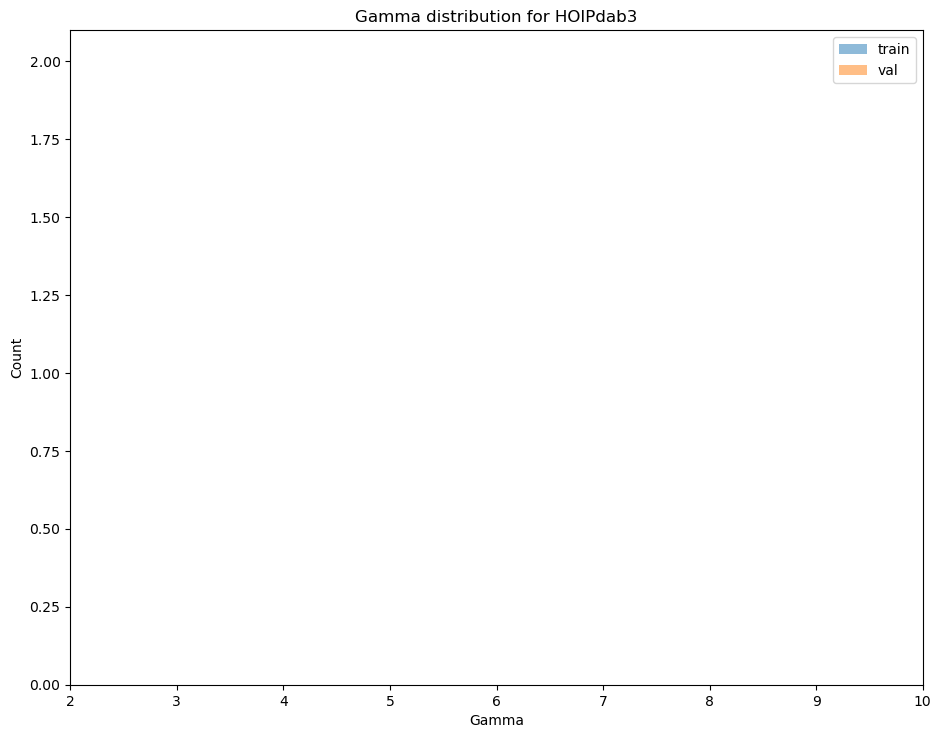

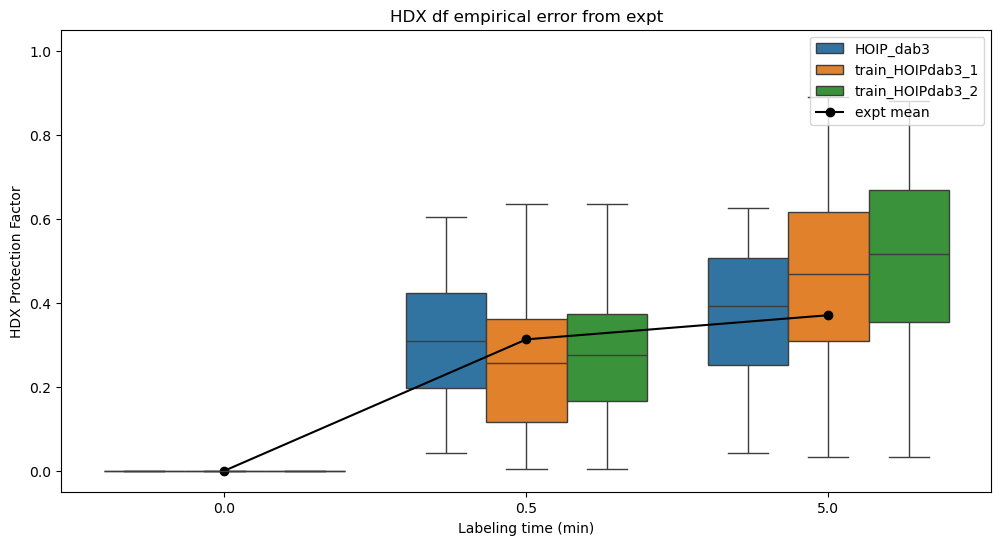

plot_dfracs_compare
     0.0       0.5       5.0  peptide         calc_name  ResStr  ResEnd  \
0    0.0  0.466730  0.435960        0         HOIP_dab3     NaN     NaN   
1    0.0  0.329020  0.417330        1         HOIP_dab3     NaN     NaN   
2    0.0  0.437680  0.514650        2         HOIP_dab3     NaN     NaN   
3    0.0  0.494070  0.550190        3         HOIP_dab3     NaN     NaN   
4    0.0  0.409740  0.499740        4         HOIP_dab3     NaN     NaN   
5    0.0  0.465490  0.532690        5         HOIP_dab3     NaN     NaN   
6    0.0  0.518650  0.575630        6         HOIP_dab3     NaN     NaN   
7    0.0  0.428950  0.505910        7         HOIP_dab3     NaN     NaN   
8    0.0  0.487080  0.544800        8         HOIP_dab3     NaN     NaN   
9    0.0  0.490180  0.554120        9         HOIP_dab3     NaN     NaN   
10   0.0  0.522240  0.584780       10         HOIP_dab3     NaN     NaN   
11   0.0  0.490080  0.531890       11         HOIP_dab3     NaN     NaN   
12   

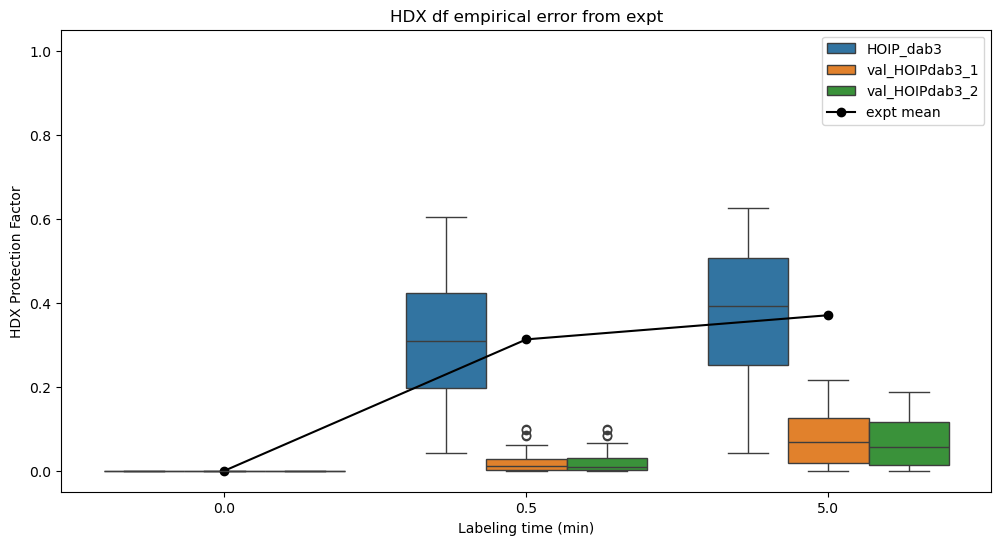

plot_dfracs_compare
     0.0       0.5       5.0  peptide         calc_name  ResStr  ResEnd  \
0    0.0  0.466730  0.435960        0         HOIP_dab3     NaN     NaN   
1    0.0  0.329020  0.417330        1         HOIP_dab3     NaN     NaN   
2    0.0  0.437680  0.514650        2         HOIP_dab3     NaN     NaN   
3    0.0  0.494070  0.550190        3         HOIP_dab3     NaN     NaN   
4    0.0  0.409740  0.499740        4         HOIP_dab3     NaN     NaN   
5    0.0  0.465490  0.532690        5         HOIP_dab3     NaN     NaN   
6    0.0  0.518650  0.575630        6         HOIP_dab3     NaN     NaN   
7    0.0  0.428950  0.505910        7         HOIP_dab3     NaN     NaN   
8    0.0  0.487080  0.544800        8         HOIP_dab3     NaN     NaN   
9    0.0  0.490180  0.554120        9         HOIP_dab3     NaN     NaN   
10   0.0  0.522240  0.584780       10         HOIP_dab3     NaN     NaN   
11   0.0  0.490080  0.531890       11         HOIP_dab3     NaN     NaN   
12   

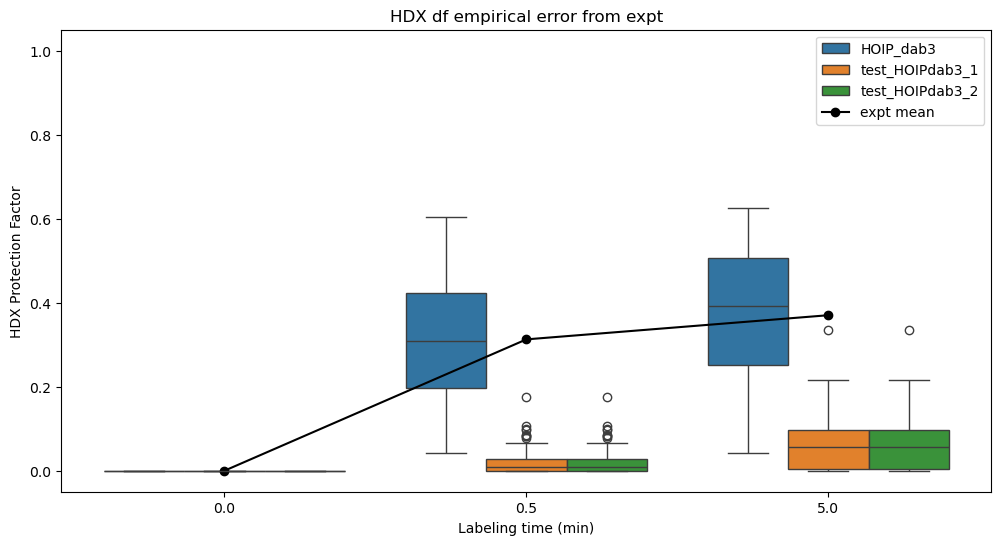

train_rep_names ['train_HOIPdab3_1', 'train_HOIPdab3_2']
val_rep_names ['val_HOIPdab3_1', 'val_HOIPdab3_2']
test_rep_names ['test_HOIPdab3_1', 'test_HOIPdab3_2']
train_rep_peptides [77, 10, 4, 83, 62, 67, 30, 45, 95, 11, 81, 79, 0, 80, 18, 69, 56, 76, 106, 42, 12, 36, 64, 26, 22, 31, 47, 100, 15, 44, 88, 89, 9, 33, 55, 103, 28, 40, 5, 53, 107, 39, 35, 16, 78, 34, 66, 7, 43, 65, 72, 27, 19, 90]
val_rep_peptides [1, 2, 3, 6, 8, 13, 14, 17, 20, 21, 23, 24, 25, 29, 32, 37, 38, 41, 46, 48, 49, 50, 51, 52, 54, 57, 58, 59, 60, 61, 63, 68, 70, 71, 73, 74, 75, 82, 84, 85, 86, 87, 91, 92, 93, 94, 96, 97, 98, 99, 101, 102, 104, 105]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 9

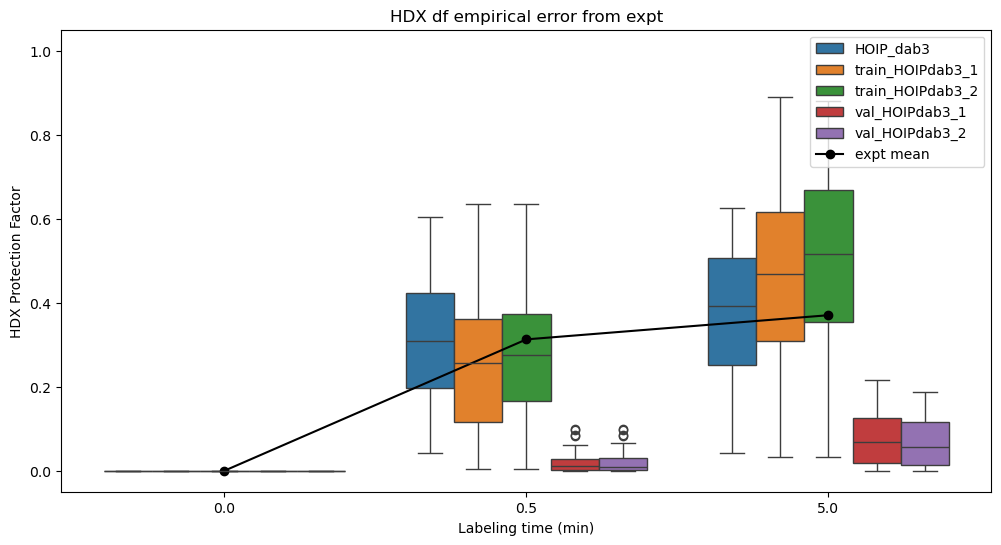

plotting paired errors
     0.0       0.5       5.0  peptide         calc_name  ResStr  ResEnd  \
0    0.0  0.466730  0.435960        0         HOIP_dab3     NaN     NaN   
1    0.0  0.329020  0.417330        1         HOIP_dab3     NaN     NaN   
2    0.0  0.437680  0.514650        2         HOIP_dab3     NaN     NaN   
3    0.0  0.494070  0.550190        3         HOIP_dab3     NaN     NaN   
4    0.0  0.409740  0.499740        4         HOIP_dab3     NaN     NaN   
5    0.0  0.465490  0.532690        5         HOIP_dab3     NaN     NaN   
6    0.0  0.518650  0.575630        6         HOIP_dab3     NaN     NaN   
7    0.0  0.428950  0.505910        7         HOIP_dab3     NaN     NaN   
8    0.0  0.487080  0.544800        8         HOIP_dab3     NaN     NaN   
9    0.0  0.490180  0.554120        9         HOIP_dab3     NaN     NaN   
10   0.0  0.522240  0.584780       10         HOIP_dab3     NaN     NaN   
11   0.0  0.490080  0.531890       11         HOIP_dab3     NaN     NaN   
12

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


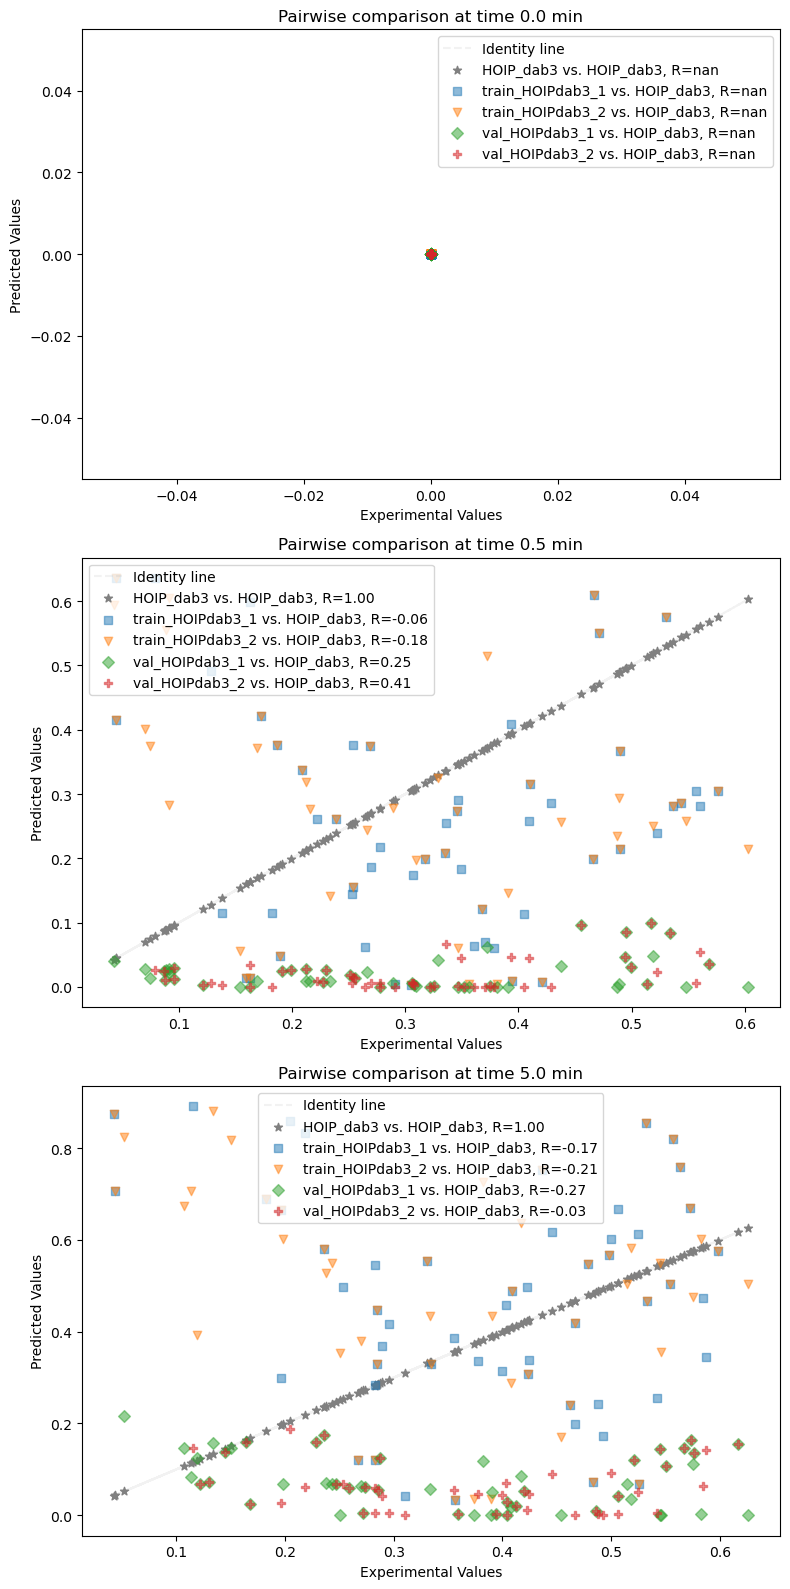

plotting paired errors
     0.0       0.5       5.0  peptide         calc_name  ResStr  ResEnd  \
0    0.0  0.466730  0.435960        0         HOIP_dab3     NaN     NaN   
1    0.0  0.329020  0.417330        1         HOIP_dab3     NaN     NaN   
2    0.0  0.437680  0.514650        2         HOIP_dab3     NaN     NaN   
3    0.0  0.494070  0.550190        3         HOIP_dab3     NaN     NaN   
4    0.0  0.409740  0.499740        4         HOIP_dab3     NaN     NaN   
5    0.0  0.465490  0.532690        5         HOIP_dab3     NaN     NaN   
6    0.0  0.518650  0.575630        6         HOIP_dab3     NaN     NaN   
7    0.0  0.428950  0.505910        7         HOIP_dab3     NaN     NaN   
8    0.0  0.487080  0.544800        8         HOIP_dab3     NaN     NaN   
9    0.0  0.490180  0.554120        9         HOIP_dab3     NaN     NaN   
10   0.0  0.522240  0.584780       10         HOIP_dab3     NaN     NaN   
11   0.0  0.490080  0.531890       11         HOIP_dab3     NaN     NaN   
12

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


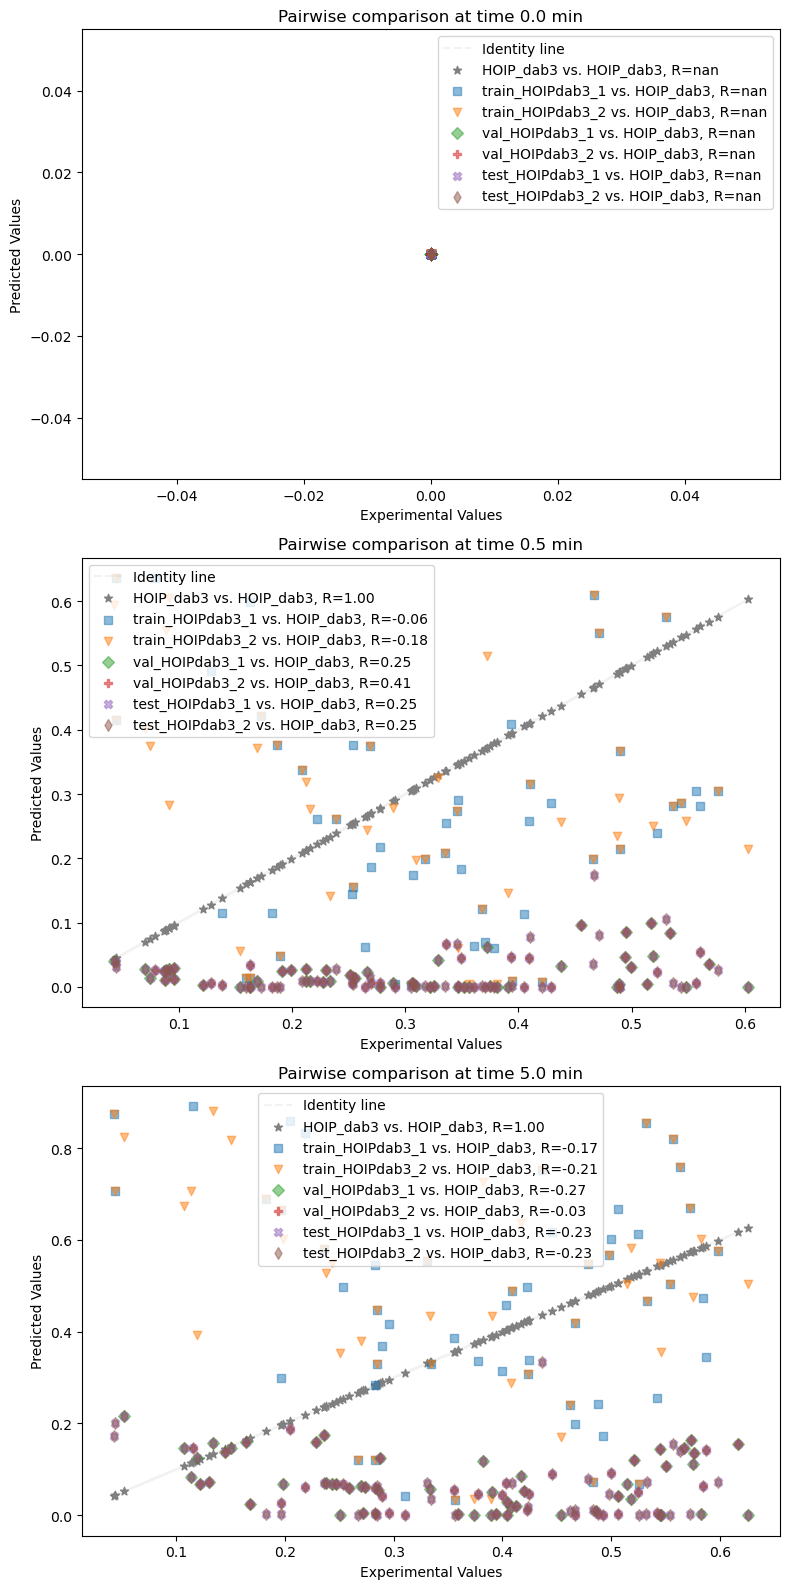

plotting paired trainval agreement
     0.0       0.5       5.0  peptide         calc_name  ResStr  ResEnd  \
0    0.0  0.466730  0.435960        0         HOIP_dab3     NaN     NaN   
1    0.0  0.329020  0.417330        1         HOIP_dab3     NaN     NaN   
2    0.0  0.437680  0.514650        2         HOIP_dab3     NaN     NaN   
3    0.0  0.494070  0.550190        3         HOIP_dab3     NaN     NaN   
4    0.0  0.409740  0.499740        4         HOIP_dab3     NaN     NaN   
5    0.0  0.465490  0.532690        5         HOIP_dab3     NaN     NaN   
6    0.0  0.518650  0.575630        6         HOIP_dab3     NaN     NaN   
7    0.0  0.428950  0.505910        7         HOIP_dab3     NaN     NaN   
8    0.0  0.487080  0.544800        8         HOIP_dab3     NaN     NaN   
9    0.0  0.490180  0.554120        9         HOIP_dab3     NaN     NaN   
10   0.0  0.522240  0.584780       10         HOIP_dab3     NaN     NaN   
11   0.0  0.490080  0.531890       11         HOIP_dab3     NaN  

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1340: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([[t, R, arg]], columns=["Time", "R", "calc_name"])])
/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1359: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries i

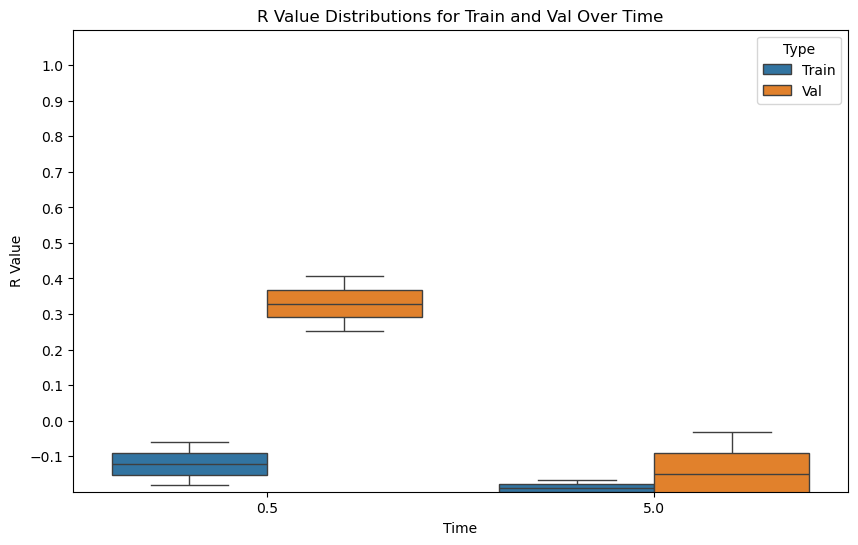

nan_df
     0.0       0.5       5.0  peptide         calc_name  ResStr  ResEnd  \
0    0.0  0.290250  0.497740       77  train_HOIPdab3_1     NaN     NaN   
1    0.0  0.238950  0.472310       10  train_HOIPdab3_1     NaN     NaN   
2    0.0  0.257720  0.601520        4  train_HOIPdab3_1     NaN     NaN   
3    0.0  0.598510  0.859200       83  train_HOIPdab3_1     NaN     NaN   
4    0.0  0.575780  0.820440       62  train_HOIPdab3_1     NaN     NaN   
5    0.0  0.155740  0.330400       67  train_HOIPdab3_1     NaN     NaN   
6    0.0  0.255180  0.457160       30  train_HOIPdab3_1     NaN     NaN   
7    0.0  0.048790  0.328590       45  train_HOIPdab3_1     NaN     NaN   
8    0.0  0.415900  0.707580       95  train_HOIPdab3_1     NaN     NaN   
9    0.0  0.367710  0.854760       11  train_HOIPdab3_1     NaN     NaN   
10   0.0  0.635570  0.890710       81  train_HOIPdab3_1     NaN     NaN   
11   0.0  0.421190  0.689540       79  train_HOIPdab3_1     NaN     NaN   
12   0.0  0.609080

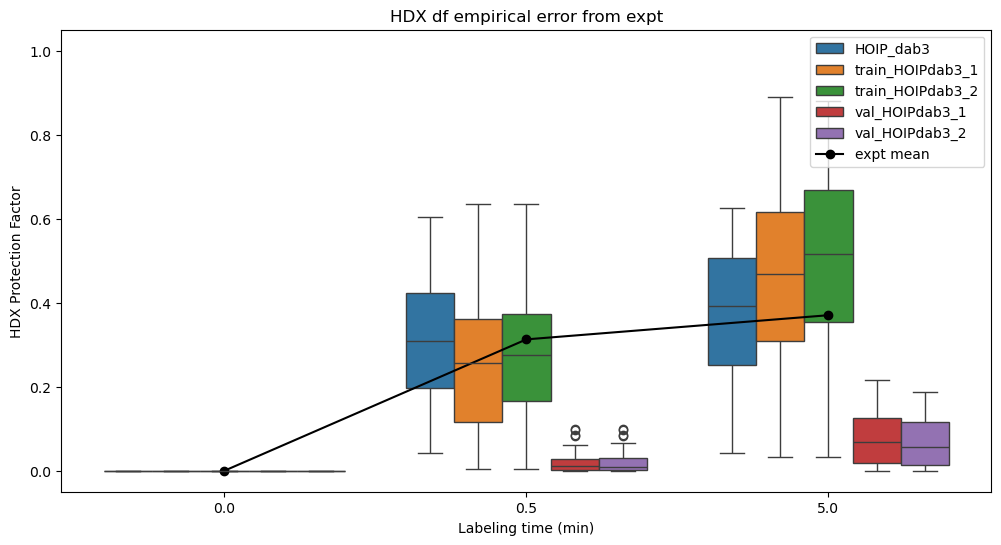

plot_dfracs_compare_abs
     0.0       0.5       5.0  peptide         calc_name  ResStr  ResEnd  \
0    0.0  0.290250  0.497740       77  train_HOIPdab3_1     NaN     NaN   
1    0.0  0.238950  0.472310       10  train_HOIPdab3_1     NaN     NaN   
2    0.0  0.257720  0.601520        4  train_HOIPdab3_1     NaN     NaN   
3    0.0  0.598510  0.859200       83  train_HOIPdab3_1     NaN     NaN   
4    0.0  0.575780  0.820440       62  train_HOIPdab3_1     NaN     NaN   
5    0.0  0.155740  0.330400       67  train_HOIPdab3_1     NaN     NaN   
6    0.0  0.255180  0.457160       30  train_HOIPdab3_1     NaN     NaN   
7    0.0  0.048790  0.328590       45  train_HOIPdab3_1     NaN     NaN   
8    0.0  0.415900  0.707580       95  train_HOIPdab3_1     NaN     NaN   
9    0.0  0.367710  0.854760       11  train_HOIPdab3_1     NaN     NaN   
10   0.0  0.635570  0.890710       81  train_HOIPdab3_1     NaN     NaN   
11   0.0  0.421190  0.689540       79  train_HOIPdab3_1     NaN     NaN   
1

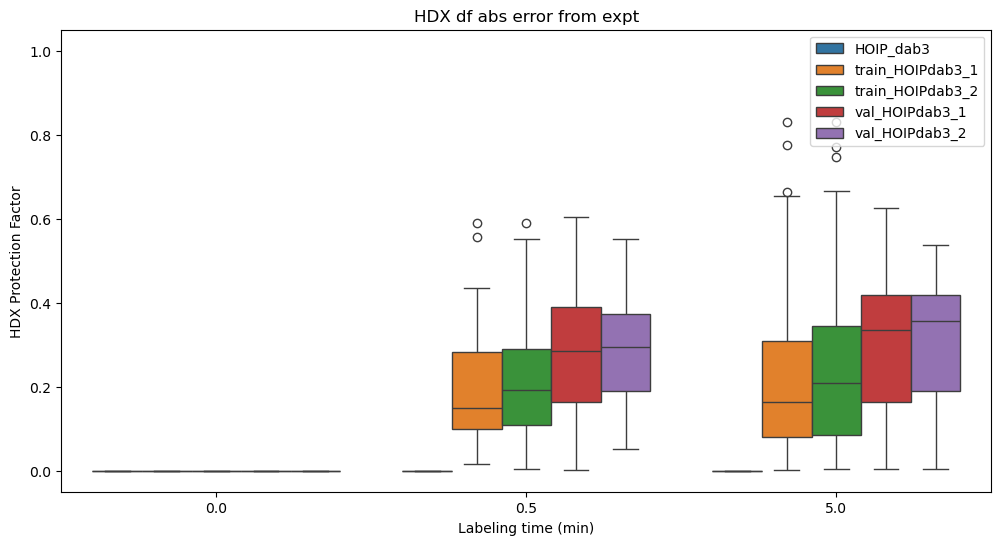

plot_dfracs_compare_MSE
     0.0       0.5       5.0  peptide         calc_name  ResStr  ResEnd  \
0    0.0  0.290250  0.497740       77  train_HOIPdab3_1     NaN     NaN   
1    0.0  0.238950  0.472310       10  train_HOIPdab3_1     NaN     NaN   
2    0.0  0.257720  0.601520        4  train_HOIPdab3_1     NaN     NaN   
3    0.0  0.598510  0.859200       83  train_HOIPdab3_1     NaN     NaN   
4    0.0  0.575780  0.820440       62  train_HOIPdab3_1     NaN     NaN   
5    0.0  0.155740  0.330400       67  train_HOIPdab3_1     NaN     NaN   
6    0.0  0.255180  0.457160       30  train_HOIPdab3_1     NaN     NaN   
7    0.0  0.048790  0.328590       45  train_HOIPdab3_1     NaN     NaN   
8    0.0  0.415900  0.707580       95  train_HOIPdab3_1     NaN     NaN   
9    0.0  0.367710  0.854760       11  train_HOIPdab3_1     NaN     NaN   
10   0.0  0.635570  0.890710       81  train_HOIPdab3_1     NaN     NaN   
11   0.0  0.421190  0.689540       79  train_HOIPdab3_1     NaN     NaN   
1

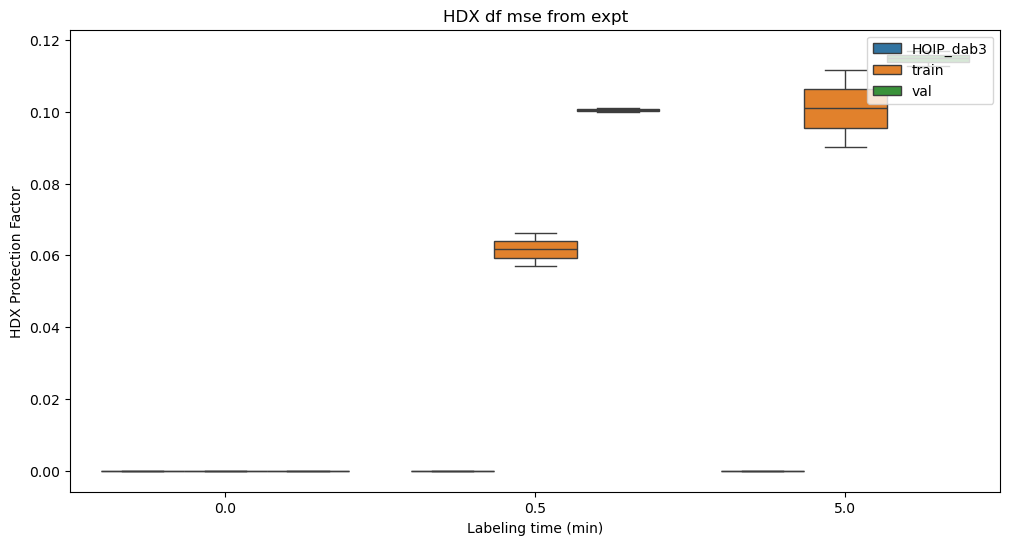

plotting paired errors
     0.0       0.5       5.0  peptide         calc_name  ResStr  ResEnd  \
0    0.0  0.290250  0.497740       77  train_HOIPdab3_1     NaN     NaN   
1    0.0  0.238950  0.472310       10  train_HOIPdab3_1     NaN     NaN   
2    0.0  0.257720  0.601520        4  train_HOIPdab3_1     NaN     NaN   
3    0.0  0.598510  0.859200       83  train_HOIPdab3_1     NaN     NaN   
4    0.0  0.575780  0.820440       62  train_HOIPdab3_1     NaN     NaN   
5    0.0  0.155740  0.330400       67  train_HOIPdab3_1     NaN     NaN   
6    0.0  0.255180  0.457160       30  train_HOIPdab3_1     NaN     NaN   
7    0.0  0.048790  0.328590       45  train_HOIPdab3_1     NaN     NaN   
8    0.0  0.415900  0.707580       95  train_HOIPdab3_1     NaN     NaN   
9    0.0  0.367710  0.854760       11  train_HOIPdab3_1     NaN     NaN   
10   0.0  0.635570  0.890710       81  train_HOIPdab3_1     NaN     NaN   
11   0.0  0.421190  0.689540       79  train_HOIPdab3_1     NaN     NaN   
12

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


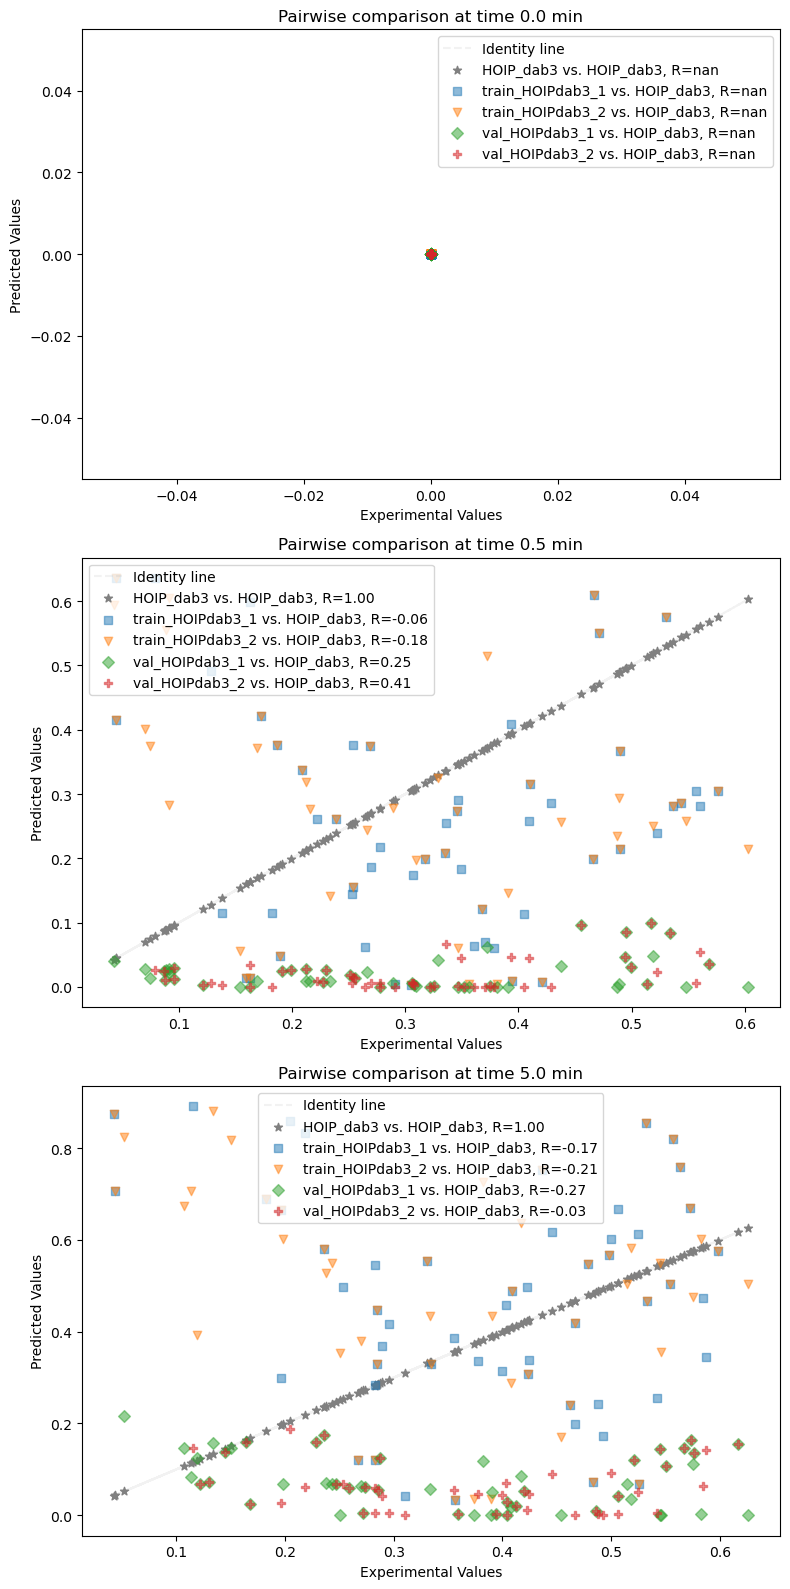

In [39]:
train_dfs, val_dfs, train_gammas, val_gammas = VDX.run_VDX(calc_name=test_name, expt_name=expt_name)

In [40]:
VDX.HDX_data

0.0       0.5       5.0  peptide         calc_name  ResStr  ResEnd  \
0    0.0  0.466730  0.435960        0         HOIP_dab3     NaN     NaN   
1    0.0  0.329020  0.417330        1         HOIP_dab3     NaN     NaN   
2    0.0  0.437680  0.514650        2         HOIP_dab3     NaN     NaN   
3    0.0  0.494070  0.550190        3         HOIP_dab3     NaN     NaN   
4    0.0  0.409740  0.499740        4         HOIP_dab3     NaN     NaN   
5    0.0  0.465490  0.532690        5         HOIP_dab3     NaN     NaN   
6    0.0  0.518650  0.575630        6         HOIP_dab3     NaN     NaN   
7    0.0  0.428950  0.505910        7         HOIP_dab3     NaN     NaN   
8    0.0  0.487080  0.544800        8         HOIP_dab3     NaN     NaN   
9    0.0  0.490180  0.554120        9         HOIP_dab3     NaN     NaN   
10   0.0  0.522240  0.584780       10         HOIP_dab3     NaN     NaN   
11   0.0  0.490080  0.531890       11         HOIP_dab3     NaN     NaN   
12   0.0  0.543600  0.572610       12         HOIP_dab3     NaN     NaN   
13   0.0  0.548080  0.583050       13         HOIP_dab3     NaN     NaN   
14   0.0  0.603120  0.626070       14         HOIP_dab3     NaN     NaN   
15   0.0  0.575940  0.598220       15         HOIP_dab3     NaN     NaN   
16   0.0  0.560900  0.587240       16         HOIP_dab3     NaN     NaN   
17   0.0  0.162770  0.272040       17         HOIP_dab3     NaN     NaN   
18   0.0  0.163220  0.282760       18         HOIP_dab3     NaN     NaN   
19   0.0  0.159590  0.267070       19         HOIP_dab3     NaN     NaN   
20   0.0  0.309840  0.407470       20         HOIP_dab3     NaN     NaN   
21   0.0  0.325880  0.412220       21         HOIP_dab3     NaN     NaN   
22   0.0  0.317410  0.423760       22         HOIP_dab3     NaN     NaN   
23   0.0  0.381340  0.389140       23         HOIP_dab3     NaN     NaN   
24   0.0  0.356550  0.373870       24         HOIP_dab3     NaN     NaN   
25   0.0  0.351630  0.404540       25         HOIP_dab3     NaN     NaN   
26   0.0  0.291410  0.310690       26         HOIP_dab3     NaN     NaN   
27   0.0  0.305520  0.355900       27         HOIP_dab3     NaN     NaN   
28   0.0  0.348900  0.424740       28         HOIP_dab3     NaN     NaN   
29   0.0  0.277290  0.359370       29         HOIP_dab3     NaN     NaN   
30   0.0  0.336190  0.403630       30         HOIP_dab3     NaN     NaN   
31   0.0  0.345920  0.409190       31         HOIP_dab3     NaN     NaN   
32   0.0  0.322160  0.393610       32         HOIP_dab3     NaN     NaN   
33   0.0  0.409860  0.478980       33         HOIP_dab3     NaN     NaN   
34   0.0  0.360710  0.488030       34         HOIP_dab3     NaN     NaN   
35   0.0  0.378890  0.492250       35         HOIP_dab3     NaN     NaN   
36   0.0  0.370450  0.466990       36         HOIP_dab3     NaN     NaN   
37   0.0  0.346730  0.453610       37         HOIP_dab3     NaN     NaN   
38   0.0  0.391100  0.546260       38         HOIP_dab3     NaN     NaN   
39   0.0  0.335270  0.466750       39         HOIP_dab3     NaN     NaN   
40   0.0  0.405260  0.542390       40         HOIP_dab3     NaN     NaN   
41   0.0  0.374870  0.486040       41         HOIP_dab3     NaN     NaN   
42   0.0  0.367680  0.462310       42         HOIP_dab3     NaN     NaN   
43   0.0  0.394300  0.482950       43         HOIP_dab3     NaN     NaN   
44   0.0  0.421230  0.525270       44         HOIP_dab3     NaN     NaN   
45   0.0  0.189730  0.284610       45         HOIP_dab3     NaN     NaN   
46   0.0  0.154400  0.250390       46         HOIP_dab3     NaN     NaN   
47   0.0  0.182250  0.295830       47         HOIP_dab3     NaN     NaN   
48   0.0  0.499140  0.520710       48         HOIP_dab3     NaN     NaN   
49   0.0  0.568340  0.575940       49         HOIP_dab3     NaN     NaN   
50   0.0  0.251640  0.287790       50         HOIP_dab3     NaN     NaN   
51   0.0  0.199070  0.235990       51         HOIP_dab3     NaN     NaN   
52   0.0  0.191250  0.228330  

In [41]:
# VDX.save_experiment()

# dump = train_dfs, val_dfs, train_gammas, val_gammas

# import pickle
# with open(f'dump_{VDX.name}.pickle', 'wb') as f:
#     print(f"Saving pickle", f'dump_{VDX.name}.pickle')
#     pickle.dump(dump, f)

In [42]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
VDX = VDX.load_experiment(load_path='logs/test30_1706140914.pkl')

In [ ]:
with open('dump_test30.pickle', 'rb') as f:
    dump = pickle.load(f)

train_dfs, val_dfs, train_gammas, val_gammas = dump

VDX.evaluate_HDX(train_dfs=train_dfs, 
                 val_dfs=val_dfs, 
                 calc_name=test_name,
                 expt_name=expt_name,
                 train_gammas=train_gammas, 
                 val_gammas=val_gammas, 
                 n_reps=VDX.settings.replicates,
                   )

In [ ]:
import pandas as pd

In [ ]:
# file_name = "covid_submissions_all_info.csv"

In [ ]:
# sub_test = pd.read_csv(file_name)

In [ ]:
# sub_test.columns.to_list()